In [9]:
from surprise import Dataset
from surprise import Reader
from surprise import model_selection
from surprise.model_selection import cross_validate
#from surprise import evaluate, print_perf
#from surprise import print_perf
from surprise import SVD
from surprise import NMF
from surprise import KNNBasic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#load data from a file:Ques 3
file_path = os.path.expanduser('C:/Users/User/Documents/MachineLearning/MachineLearning/h7/restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

In [10]:
#class surprise.model_selection.split.KFold(n_splits=3, random_state=None, shuffle=True)
algo = SVD()
perf_svd = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
#print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9436  0.9420  0.9450  0.9435  0.0012  
MAE (testset)     0.7440  0.7442  0.7465  0.7449  0.0011  
Fit time          33.36   33.37   33.30   33.35   0.03    
Test time         2.35    2.38    2.39    2.37    0.01    


In [11]:
#data.split(n_folds=3)
algo = SVD(biased=False) #PMF
perf_pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
#print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9713  0.9623  0.9667  0.9668  0.0037  
MAE (testset)     0.7684  0.7584  0.7617  0.7629  0.0042  
Fit time          33.24   33.35   33.26   33.28   0.05    
Test time         2.07    2.09    2.07    2.08    0.01    


In [12]:
#NMF
algo = NMF()
perf_nmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9791  0.9722  0.9742  0.9752  0.0029  
MAE (testset)     0.7698  0.7630  0.7648  0.7658  0.0029  
Fit time          30.05   30.11   30.42   30.20   0.16    
Test time         1.86    2.02    2.02    1.97    0.08    


In [13]:
algo = KNNBasic(sim_options = {'user_based': True})
perf_ub = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9836  0.9926  0.9893  0.9885  0.0037  
MAE (testset)     0.7783  0.7853  0.7819  0.7818  0.0029  
Fit time          2.34    2.39    2.41    2.38    0.03    
Test time         35.76   35.81   38.21   36.59   1.14    


In [14]:
algo = KNNBasic(sim_options = {'user_based': False})
perf_ib = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9886  0.9847  0.9850  0.9861  0.0018  
MAE (testset)     0.7804  0.7811  0.7816  0.7810  0.0005  
Fit time          3.22    3.29    3.32    3.27    0.04    
Test time         40.37   40.88   41.13   40.79   0.32    


In [16]:
print(perf_svd)
print(perf_pmf)
print(perf_nmf)
print(perf_ub)
print(perf_ib)

{'test_rmse': array([0.94360011, 0.94202666, 0.94497748]), 'test_mae': array([0.74400752, 0.74419412, 0.74652193]), 'fit_time': (33.361908197402954, 33.37490892410278, 33.30290484428406), 'test_time': (2.3541345596313477, 2.375136137008667, 2.389136552810669)}
{'test_rmse': array([0.97128417, 0.96232093, 0.9667355 ]), 'test_mae': array([0.76843471, 0.75843131, 0.76170809]), 'fit_time': (33.23890137672424, 33.354907751083374, 33.259902477264404), 'test_time': (2.066118001937866, 2.0921196937561035, 2.0711183547973633)}
{'test_rmse': array([0.97911734, 0.97223628, 0.97419438]), 'test_mae': array([0.76977133, 0.76299427, 0.764758  ]), 'fit_time': (30.049718618392944, 30.113722324371338, 30.424740314483643), 'test_time': (1.8561062812805176, 2.020115375518799, 2.024115800857544)}
{'test_rmse': array([0.98356994, 0.99259527, 0.98931763]), 'test_mae': array([0.77833222, 0.78533349, 0.78188361]), 'fit_time': (2.3411338329315186, 2.389137029647827, 2.406137466430664), 'test_time': (35.76304531

In [17]:
#14
algo = KNNBasic(sim_options = {
'name':'MSD',
'user_based': True
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9897  0.9907  0.9878  0.9894  0.0012  
MAE (testset)     0.7824  0.7829  0.7804  0.7819  0.0011  
Fit time          2.44    2.39    2.42    2.42    0.02    
Test time         36.47   35.90   36.10   36.15   0.24    
{'test_rmse': array([0.98969074, 0.99066609, 0.98782505]), 'test_mae': array([0.78243645, 0.78292628, 0.78040388]), 'fit_time': (2.4401395320892334, 2.392137050628662, 2.4241385459899902), 'test_time': (36.46708559989929, 35.89705300331116, 36.0960648059845)}


In [18]:
algo = KNNBasic(sim_options = {
'name':'cosine',
'user_based': True
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0239  1.0217  1.0183  1.0213  0.0023  
MAE (testset)     0.8116  0.8089  0.8065  0.8090  0.0021  
Fit time          10.33   10.17   10.28   10.26   0.07    
Test time         36.26   35.95   35.87   36.02   0.17    
{'test_rmse': array([1.0238585 , 1.02165582, 1.01829941]), 'test_mae': array([0.81156443, 0.8088939 , 0.80652814]), 'fit_time': (10.3315908908844, 10.171581745147705, 10.276587963104248), 'test_time': (36.25507378578186, 35.95205616950989, 35.86505126953125)}


In [19]:
algo = KNNBasic(sim_options = {
'name':'pearson',
'user_based': True
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0229  1.0183  1.0213  1.0208  0.0019  
MAE (testset)     0.8123  0.8070  0.8102  0.8098  0.0022  
Fit time          13.27   13.37   13.46   13.37   0.08    
Test time         35.28   35.94   35.66   35.63   0.27    
{'test_rmse': array([1.02292396, 1.01825279, 1.02133198]), 'test_mae': array([0.81233872, 0.80696396, 0.81021971]), 'fit_time': (13.266758680343628, 13.373764991760254, 13.463769912719727), 'test_time': (35.282018184661865, 35.93805551528931, 35.664039850234985)}


In [20]:
#item_based
algo = KNNBasic(sim_options = {
'name':'MSD',
'user_based': False
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9824  0.9867  0.9850  0.9847  0.0018  
MAE (testset)     0.7791  0.7816  0.7787  0.7798  0.0013  
Fit time          3.23    3.24    3.26    3.24    0.01    
Test time         40.81   40.64   40.43   40.62   0.15    
{'test_rmse': array([0.98241994, 0.98671571, 0.98504335]), 'test_mae': array([0.77908407, 0.78156525, 0.7786566 ]), 'fit_time': (3.23018479347229, 3.239185094833374, 3.2571864128112793), 'test_time': (40.80533409118652, 40.636324405670166, 40.42831230163574)}


In [21]:
algo = KNNBasic(sim_options = {
'name':'cosine',
'user_based': False
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0372  1.0394  1.0304  1.0357  0.0038  
MAE (testset)     0.8248  0.8255  0.8166  0.8223  0.0040  
Fit time          15.34   15.79   15.31   15.48   0.22    
Test time         40.53   40.59   40.53   40.55   0.03    
{'test_rmse': array([1.03721245, 1.0393521 , 1.03041706]), 'test_mae': array([0.8248115 , 0.82548703, 0.81660217]), 'fit_time': (15.339877367019653, 15.786902904510498, 15.305875539779663), 'test_time': (40.52831792831421, 40.5853214263916, 40.53431820869446)}


In [22]:
algo = KNNBasic(sim_options = {
'name':'pearson',
'user_based': False
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0511  1.0530  1.0398  1.0480  0.0058  
MAE (testset)     0.8418  0.8422  0.8311  0.8384  0.0051  
Fit time          20.79   20.93   20.99   20.90   0.08    
Test time         40.16   40.35   40.44   40.32   0.12    
{'test_rmse': array([1.05110161, 1.05295499, 1.03981958]), 'test_mae': array([0.84179229, 0.84219308, 0.83114822]), 'fit_time': (20.790189027786255, 20.928197145462036, 20.990200519561768), 'test_time': (40.15529680252075, 40.34630751609802, 40.444313287734985)}


In [38]:
best = []
name=''
k=(1,6,12,18,24)
for kvalue in k:

    for algo in [(KNNBasic(k=kvalue, sim_options = {'name':'MSD', 'user_based': True }))]:
    
       
  
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
   
        bld = pd.DataFrame.from_dict(results).mean(axis=0)
        bld2 = bld.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algo']))
        best.append(bld2)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [44]:
results

{'test_rmse': array([0.99514087, 0.9909779 , 0.98210253]),
 'fit_time': (3.249185800552368, 3.487199306488037, 3.568204164505005),
 'test_time': (36.41308283805847, 36.94211292266846, 36.84710741043091)}

In [53]:
#TEST

best = []
name=''
k=(1,6,12,18,24)
for kvalue in k:

    for algo in [(KNNBasic(k=kvalue, sim_options = {'name':'MSD', 'user_based': True }))]:
    
       
  
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
        temp = pd.DataFrame.from_dict(results).mean(axis=0)
        
        best.append(temp)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [55]:
temp

test_rmse     0.986366
fit_time      2.448140
test_time    31.798152
dtype: float64

In [56]:
#best

df = pd.DataFrame(best, columns =['test_rmse', 'fit_time', 'test_time']).sort_values('test_rmse')
  
# print the data 
df 



,test_rmse,fit_time,test_time
4,0.986366,2.448140,31.798152
3,0.986791,2.433472,29.149334
2,0.994934,2.450140,26.418178
1,1.026731,2.469808,22.488953
0,1.322997,2.505810,17.633008


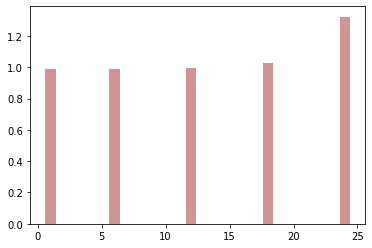

In [57]:
plt.bar(k,df.test_rmse,color='brown',align='center', alpha=0.5)
plt.show()

In [58]:
best1 = []
name=''
k=(1,6,12,18,24)
for kvalue in k:

    for algo in [(KNNBasic(k=kvalue, sim_options = {'name':'MSD', 'user_based': False }))]:
    
       
  
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
   
        temp = pd.DataFrame.from_dict(results).mean(axis=0)
        
        best1.append(temp)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [59]:
#best

df1 = pd.DataFrame(best1, columns =['test_rmse', 'fit_time', 'test_time']).sort_values('test_rmse')
  
# print the data 
df1 

,test_rmse,fit_time,test_time
4,0.991420,3.294522,35.644039
3,0.995528,3.302855,32.941551
2,1.013286,3.322190,29.966381
1,1.064255,3.292188,26.056157
0,1.432882,3.334857,20.719185


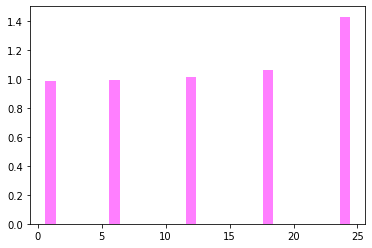

In [60]:
plt.bar(k,df1.test_rmse,color='magenta',align='center', alpha=0.5)
plt.show()